In [1]:
from dataset.dataset import load_affnist_dataset

X, X_test, y, y_test = load_affnist_dataset()

X.shape, y.shape

((8000, 1600), (8000,))

In [2]:
from models.neural_network import ClassificationNeuralNetwork


network = ClassificationNeuralNetwork(
    input_dim=1600,
    hidden_dim=800,
    output_dim=10,
    number_of_hidden_layers=1,
)

print(network)

DenseLayer: 1600 x 800 -> RandomInitializer -> ReLU 
DenseLayer: 800 x 800 -> XavierInitializer -> ReLU 
DenseLayer: 800 x 10 -> RandomInitializer -> SoftMax 



In [3]:
from models.optimizer import Optimizer
from models.metrics import CategoricalCrossEntropyLoss, Accuracy


optimizer = Optimizer(
    network,
    accuracy=Accuracy(),
    loss=CategoricalCrossEntropyLoss(),
    learning_rate=0.85,
    batch_size=128,
    epochs=30,
    reshape=False,
)

optimizer.fit(X, y)

accuracy = optimizer.accuracy
loss = optimizer.loss

Epoch 0  -- accuracy 0.167 - loss 2.245
Epoch 1  -- accuracy 0.210 - loss 2.140
Epoch 2  -- accuracy 0.292 - loss 1.958
Epoch 3  -- accuracy 0.396 - loss 1.717
Epoch 4  -- accuracy 0.490 - loss 1.456
Epoch 5  -- accuracy 0.574 - loss 1.264
Epoch 6  -- accuracy 0.643 - loss 1.056
Epoch 7  -- accuracy 0.715 - loss 0.837
Epoch 8  -- accuracy 0.789 - loss 0.652
Epoch 9  -- accuracy 0.834 - loss 0.503
Epoch 10  -- accuracy 0.902 - loss 0.314
Epoch 11  -- accuracy 0.925 - loss 0.250
Epoch 12  -- accuracy 0.966 - loss 0.132
Epoch 13  -- accuracy 0.989 - loss 0.061
Epoch 14  -- accuracy 0.996 - loss 0.036
Epoch 15  -- accuracy 0.997 - loss 0.023
Epoch 16  -- accuracy 1.000 - loss 0.009
Epoch 17  -- accuracy 1.000 - loss 0.006
Epoch 18  -- accuracy 1.000 - loss 0.004
Epoch 19  -- accuracy 1.000 - loss 0.003
Epoch 20  -- accuracy 1.000 - loss 0.003
Epoch 21  -- accuracy 1.000 - loss 0.003
Epoch 22  -- accuracy 1.000 - loss 0.002
Epoch 23  -- accuracy 1.000 - loss 0.002
Epoch 24  -- accuracy 1.00

In [4]:
import matplotlib.pyplot as plt

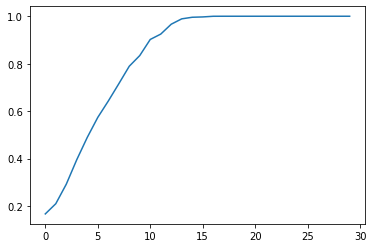

In [5]:
plt.plot(accuracy)
plt.show()

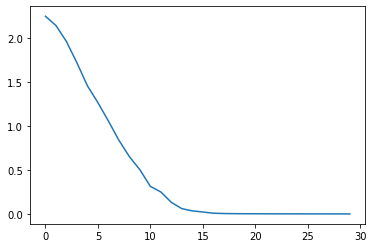

In [6]:
plt.plot(loss)
plt.show()

In [7]:
import numpy as np

acc = Accuracy()
loss = CategoricalCrossEntropyLoss()
test_accuracy = np.mean(
    [
        acc.calculate(network.forward(X_val), y_val)
        for X_val, y_val in zip(X_test, y_test)
    ]
)

f"Model accuracy is {test_accuracy}"

'Model accuracy is 0.7155'